In [1]:
%matplotlib inline
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import seaborn as sns
import numpy as np
np.set_printoptions(linewidth=200) # Sets message printing width for easier readability

## Look at mD, aeff, and mPi1 as a function of fpi and bsmall

In [2]:
#-- Define Parameters to scan over --#
fpi_num_arr    = np.array([  3,  3.2,  3.4,  3.6,  3.8,  4.]) #np.array([ 2,  3,  4,  5,  6])
bsmall_num_arr = np.array([ -2, -2.2, -2.4, -2.6, -2.8, -3.]) #np.array([-2, -3, -4, -5, -6])

#-- Define fixed parameters --#
gs     = 1e-2
asmall = 1e-3
sQsq   = 1e-3
kappa  = 1

In [3]:
from m1_aeff import m1_aeff

#-- Create grid of fpi_num and bsmall_num values --#
fpi_num_mesh, bsmall_num_mesh = np.meshgrid(fpi_num_arr, bsmall_num_arr)
print(np.shape(fpi_num_mesh), np.shape(bsmall_num_mesh))

param_arr = []

for fpi_num, bsmall_num in zip(fpi_num_mesh.reshape(-1), bsmall_num_mesh.reshape(-1)):
    
    fpi    = 10.**fpi_num
    bsmall = 10.**bsmall_num
    
    kwargs = { "fpi":fpi, "bsmall":bsmall, "gs":gs, "kappa":kappa, "asmall":asmall, "sQsq":sQsq}
    m1, aeff, mD = m1_aeff(**kwargs)
    
    param_arr.append([fpi_num, bsmall_num, gs, asmall, sQsq, kappa, m1, np.real(aeff), mD])

param_arr = np.array(param_arr)

print("fpi_num:      ", param_arr[0:2,0])
print("bsmall_num:   ", param_arr[0:2,1])
print("m1 [GeV]:     ", param_arr[0:2,-3])
print("aeff [GeV-2]: ", param_arr[0:2,-2])
print("mD [GeV]:     ", param_arr[0:2,-1])



(6, 6) (6, 6)
fpi_num:       [3.  3.2]
bsmall_num:    [-2. -2.]
m1 [GeV]:      [15791.36704174 25027.63012411]
aeff [GeV-2]:  [6.59508699e-07 2.62555142e-07]
mD [GeV]:      [125.66370614 199.16355241]


# Make plots

In [4]:
def plotHeatMap(x, y, data, xlabel=r'$log_{10}(f_\pi/GeV)$', ylabel=r'$log_{10}(b_{small})$', zlabel=r'$a_{eff}$', logZ=True):
    
    if(logZ and data.min().min() > 0.):
        import math
        from matplotlib.colors import LogNorm
        log_norm = LogNorm(vmin=data.min().min(), vmax=data.max().max())
        
        cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(data.min().min())), 1+math.ceil(math.log10(data.max().max())))]

        sns.heatmap(data, norm=log_norm, cbar_kws={"ticks": cbar_ticks, "label": zlabel})
    else:
        heat_map = sns.heatmap(data)
        
    # Set axis tick values
    xticks_labels = x
    plt.xticks(np.arange(data.shape[1]) + .5, labels=xticks_labels)

    yticks_labels = y
    plt.yticks(np.arange(data.shape[0]) + .5, labels=yticks_labels)


    # Set axis labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.show()


In [5]:
 d = {"fpi_num": param_arr[:,0], "bsmall_num": param_arr[:,1], "gs": param_arr[:,2], 
         "asmall": param_arr[:,3],  "sQsq": param_arr[:,4], "kappa": param_arr[:,5],
         "m1": param_arr[:,6], "aeff": param_arr[:,7], "mD": param_arr[:,8]}

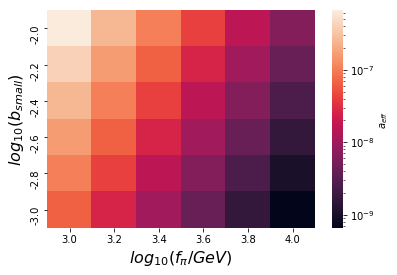

[[6.59508699e-07 2.62555142e-07 1.04525085e-07 4.16121857e-08 1.65661095e-08 6.59508699e-09]
 [4.16122352e-07 1.65661292e-07 6.59509483e-08 2.62555454e-08 1.04525209e-08 4.16122352e-09]
 [2.62555855e-07 1.04525368e-07 4.16122987e-08 1.65661545e-08 6.59510489e-09 2.62555855e-09]
 [1.65661871e-07 6.59511785e-08 2.62556371e-08 1.04525574e-08 4.16123805e-09 1.65661871e-09]
 [1.04525840e-07 4.16124864e-08 1.65662292e-08 6.59513464e-09 2.62557039e-09 1.04525840e-09]
 [6.59515652e-08 2.62557910e-08 1.04526187e-08 4.16126245e-09 1.65662842e-09 6.59515652e-10]]


In [6]:
x = fpi_num_arr
y = bsmall_num_arr
Z = d["aeff"]
data = Z.reshape(x.shape[0], y.shape[0])

plotHeatMap(x, y, data)
print(data)

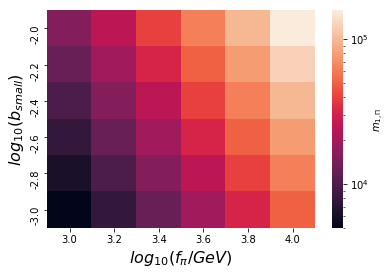

[[ 15791.36704174  25027.63012411  39666.12060714  62866.5645216   99636.7901437  157913.67041743]
 [ 12543.52870615  19880.15325582  31507.91956023  49936.68721962  79144.31562844 125435.28706151]
 [  9963.67901437  15791.36704174  25027.63012411  39666.12060714  62866.5645216   99636.7901437 ]
 [  7914.43156284  12543.52870615  19880.15325582  31507.91956023  49936.68721962  79144.31562844]
 [  6286.65645216   9963.67901437  15791.36704174  25027.63012411  39666.12060714  62866.5645216 ]
 [  4993.66872196   7914.43156284  12543.52870615  19880.15325582  31507.91956023  49936.68721962]]


In [7]:
x = fpi_num_arr
y = bsmall_num_arr
Z = d["m1"]
data = Z.reshape(x.shape[0], y.shape[0])

plotHeatMap(x, y, data, zlabel=r'$m_{1,\Pi}$')
print(data)

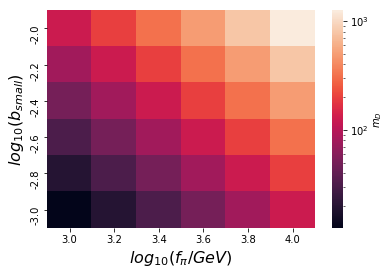

[[ 125.66370614  199.16355241  315.6529584   500.27622494  792.88438326 1256.63706144]
 [  79.28843833  125.66370614  199.16355241  315.6529584   500.27622494  792.88438326]
 [  50.02762249   79.28843833  125.66370614  199.16355241  315.6529584   500.27622494]
 [  31.56529584   50.02762249   79.28843833  125.66370614  199.16355241  315.6529584 ]
 [  19.91635524   31.56529584   50.02762249   79.28843833  125.66370614  199.16355241]
 [  12.56637061   19.91635524   31.56529584   50.02762249   79.28843833  125.66370614]]


In [8]:
x = fpi_num_arr
y = bsmall_num_arr
Z = d["mD"]
data = Z.reshape(x.shape[0], y.shape[0])

plotHeatMap(x, y, data, zlabel=r'$m_{D}$')
print(data)